In [1]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc

In [2]:
expr_matrix = pd.read_csv("ExprMat_row_gene.tsv", index_col=0, sep="\t") 
expr_matrix.head(3)

,AAAGAACTCTAAACGC-1_1,AAAGTCCAGTGCTCGC-1_1,AAAGTGAGTATCGTTG-1_1,AACAGGGGTCCTACAA-1_1,AACCACAGTGTATACC-1_1,AACCCAAAGAGGATCC-1_1,AACCCAACACGGTAGA-1_1,AACCCAAGTGCCGTTG-1_1,AACGAAAGTAGAGACC-1_1,AACGTCAAGTTTCGAC-1_1,...,TTTGGTTCAAGTATCC-1_3,TTTGGTTGTGTGTCCG-1_3,TTTGTTGAGACGAGCT-1_3,TTTGTTGAGGCTTAAA-1_3,TTTGTTGCAAGCTCTA-1_3,TTTGTTGCATCGAAGG-1_3,TTTGTTGGTTAGAGTA-1_3,TTTGTTGTCCTTCTGG-1_3,TTTGTTGTCGCAAGAG-1_3,TTTGTTGTCTATTGTC-1_3
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm19938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
expr_matrix = expr_matrix.T  # Transpose to match AnnData format (cells x genes)
expr_matrix.head(3)

,Xkr4,Gm19938,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Tcea1,Rgs20,Gm16041,...,Spin2d,Gm18336,Zfp92,Fam90a1b.1,Gm14809,8030474K03Rik,Magee2,Tceal7,Serpina7,AC087559.2
AAAGAACTCTAAACGC-1_1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGTCCAGTGCTCGC-1_1,0.0,0.0,0.0,0.0,0.0,0.447318,0.0,0.755287,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGTGAGTATCGTTG-1_1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Load UMAP coordinates
umap_coords = pd.read_csv("UMAP_coordinate.csv", index_col=0, sep=",")
umap_coords.head(5)

,umap_1,umap_2
AAACGAATCAAGTGGG-1_1,7.519389,6.254953
AAAGAACTCTAAACGC-1_1,-7.574637,-7.710628
AAAGGGCTCTGTCAGA-1_1,2.844351,3.001735
AAAGTCCAGTGCTCGC-1_1,1.854609,-7.134219
AAAGTCCCACTGGACC-1_1,7.263851,6.731787


In [5]:
# Load metadata
metadata = pd.read_csv("metadata_including_slingshot_Pseudotime.csv", index_col=0, sep=",")
metadata.head(5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,seurat_clusters,cell_type,sample,S.Score,G2M.Score,Phase,nCount_SCT,nFeature_SCT,slingPseudotime_1
AAAGAACTCTAAACGC-1_1,mar_ctl,8470,2376,5.360094,10,Myo,CTL,-0.003904,-0.056188,G1,15772,2537,90.617360
AAAGTCCAGTGCTCGC-1_1,mar_ctl,17727,4095,3.982625,4,LC_ER+_Foxa1,CTL,-0.001610,-0.020977,G1,16980,4086,25.058364
AAAGTGAGTATCGTTG-1_1,mar_ctl,6577,1859,3.801125,10,Myo,CTL,0.057718,0.001108,S,15176,2317,95.299541
AACAGGGGTCCTACAA-1_1,mar_ctl,14163,3834,4.561181,4,LC_ER+_Foxa1,CTL,-0.063219,-0.068370,G1,15752,3824,20.623190
AACCACAGTGTATACC-1_1,mar_ctl,7272,2133,4.840484,10,Myo,CTL,0.013808,-0.009712,S,15411,2452,85.006537


In [6]:
# Ensure indices match across files
umap_coords = umap_coords.loc[expr_matrix.index]
metadata = metadata.loc[expr_matrix.index]

In [7]:
# Create AnnData object
adata = ad.AnnData(expr_matrix)

In [9]:
# Add metadata to observations (cells)
adata.obs["cell_type"] = metadata["cell_type"]
adata.obs["ProjectID"] = metadata["orig.ident"]

In [10]:
# Add UMAP coordinates to obsm (observation-level multidimensional data)
adata.obsm["X_umap"] = umap_coords[["umap_1", "umap_2"]].values

In [11]:
# Save as .h5ad file
adata.write("Pseudotime_input.h5ad")

/home/audrey/anaconda3/envs/scvelo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/home/audrey/anaconda3/envs/scvelo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ProjectID' as categorical


In [12]:
adata.obs

,cell_type,ProjectID
AAAGAACTCTAAACGC-1_1,Myo,mar_ctl
AAAGTCCAGTGCTCGC-1_1,LC_ER+_Foxa1,mar_ctl
AAAGTGAGTATCGTTG-1_1,Myo,mar_ctl
AACAGGGGTCCTACAA-1_1,LC_ER+_Foxa1,mar_ctl
AACCACAGTGTATACC-1_1,Myo,mar_ctl
...,...,...
TTTGTTGCATCGAAGG-1_3,LC_ER+_Sca1,er_pic_gem1
TTTGTTGGTTAGAGTA-1_3,Late_HY,er_pic_gem1
TTTGTTGTCCTTCTGG-1_3,Late_HY,er_pic_gem1
TTTGTTGTCGCAAGAG-1_3,LC_ER+_Foxa1,er_pic_gem1


In [13]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
adata.obsm

AxisArrays with keys: X_umap

In [15]:
# PCA
sc.pp.pca(adata, n_comps=50)

In [16]:
# Compute neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

In [18]:
sc.tl.paga(adata, groups='cell_type')

<Axes:>

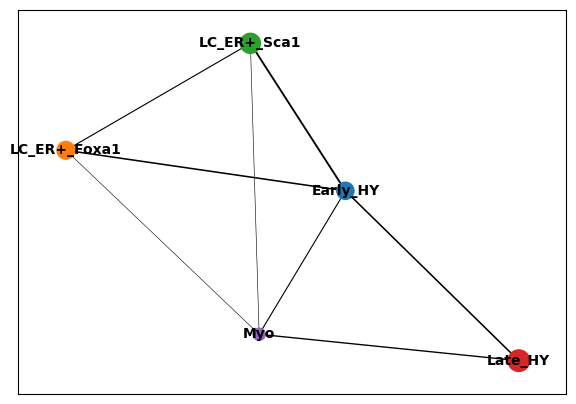

In [19]:
sc.pl.paga(adata, color=['cell_type'], threshold=0.03, show=False)

In [20]:
sc.tl.draw_graph(adata, init_pos="paga")

In [21]:
import matplotlib.pyplot as pl
import numpy as np

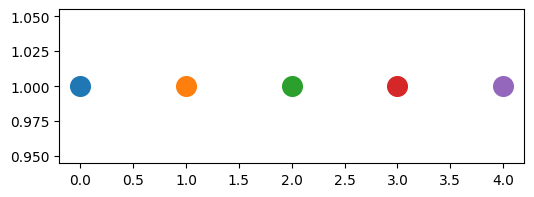

In [22]:
pl.figure(figsize=(6, 2))

for i in range(5):
    pl.scatter(i, 1, s=200)

pl.savefig('PAGA.pdf', format='pdf')
    
pl.show()

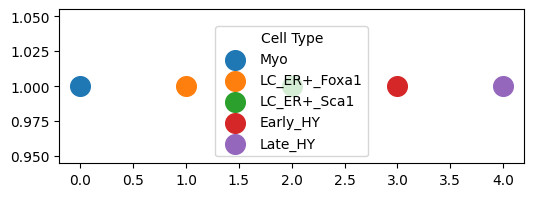

In [23]:
# Create a new plot and add scatter points with your annotations
fig, ax = pl.subplots(figsize=(6, 2))

# Plot using the annotations in adata.obs['cell_type'] as labels for the legend
for i, label in enumerate(adata.obs['cell_type'].unique()):
    ax.scatter(i, 1, s=200, label=label)

# Add the legend
ax.legend(title="Cell Type")

# Show the plot
pl.show()

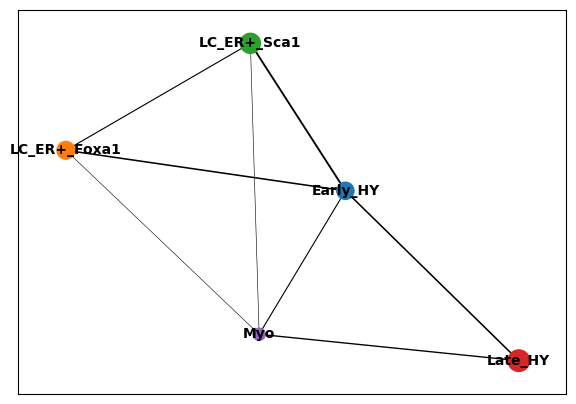

In [24]:
sc.pl.paga(adata, color=['cell_type'], threshold=0.03, show=False)

pl.savefig('PAGA_graph.pdf', format='pdf')